In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("Train.csv")
df_test = pd.read_csv('Test.csv')
df_train = df.drop(['Item_Outlet_Sales'], axis=1)
#df_concat = pd.concat([df.drop(['Item_Outlet_Sales'], axis=1), df_test])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Text(0.5, 0, 'Item Identifier')

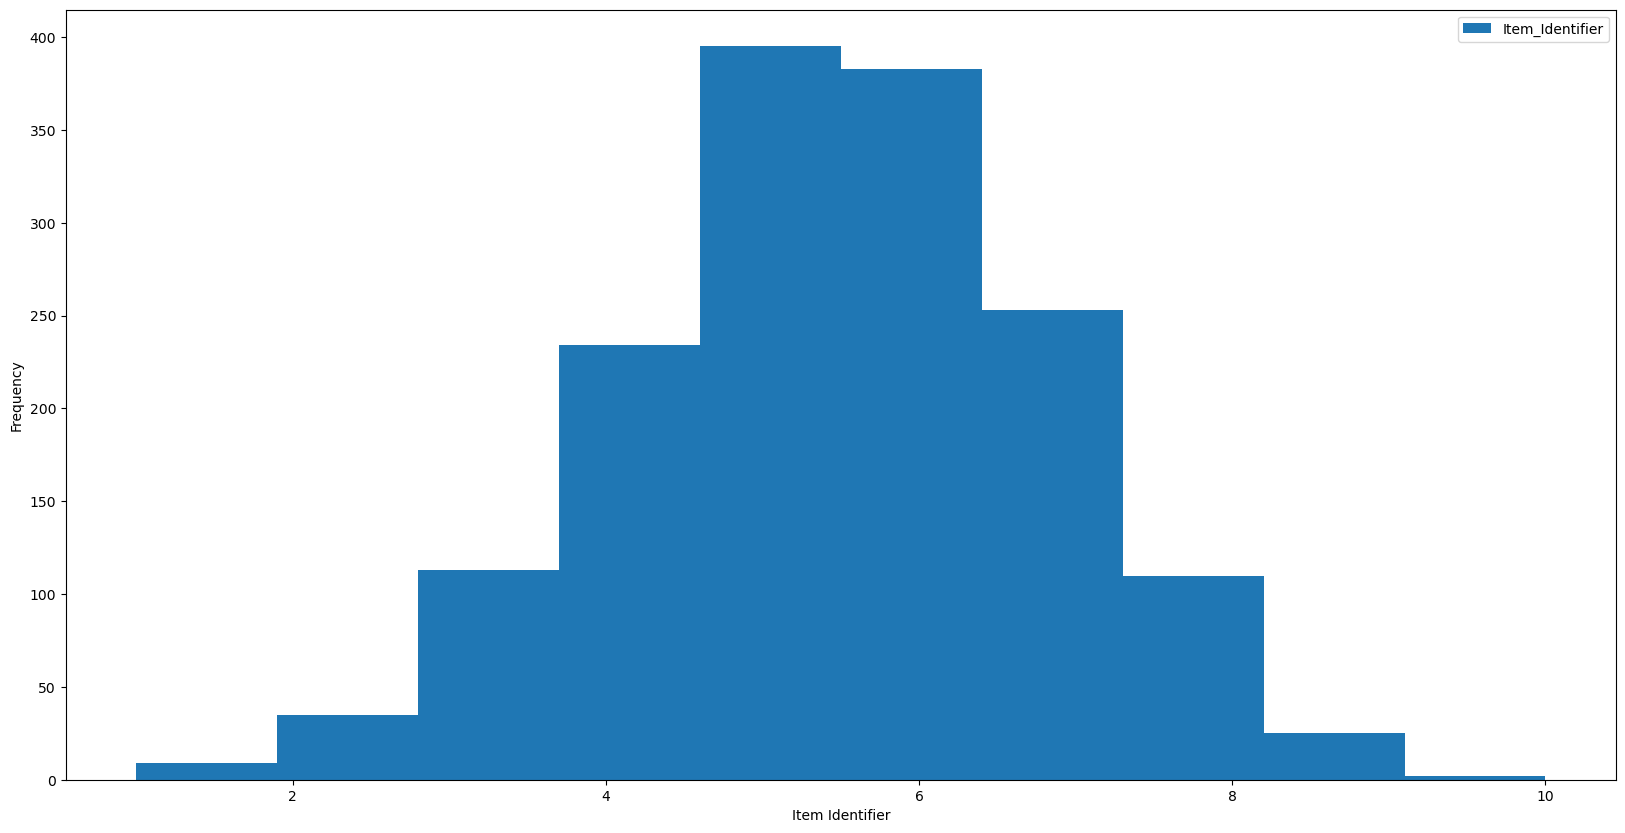

In [10]:
(pd.DataFrame(df["Item_Identifier"].value_counts())).plot(kind='hist' , figsize=(20,10))
plt.xlabel("Item Identifier")

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

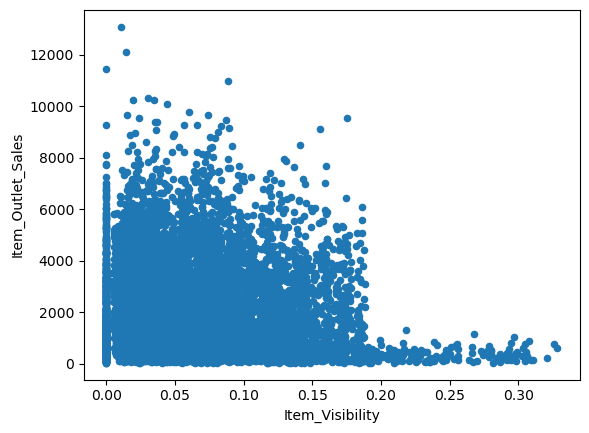

In [11]:
(df[['Item_Visibility', 'Item_Outlet_Sales']]).plot(kind="scatter", x='Item_Visibility' , y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Location_Type'>

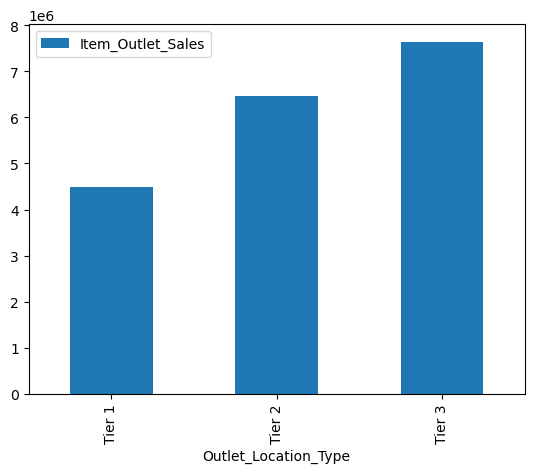

In [12]:
(df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().reset_index()).plot(kind="bar", x='Outlet_Location_Type' , y='Item_Outlet_Sales')

In [13]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

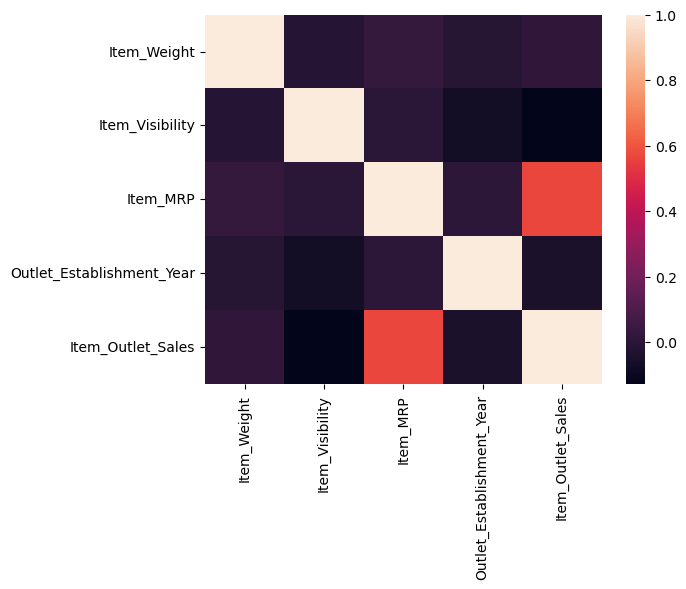

In [14]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

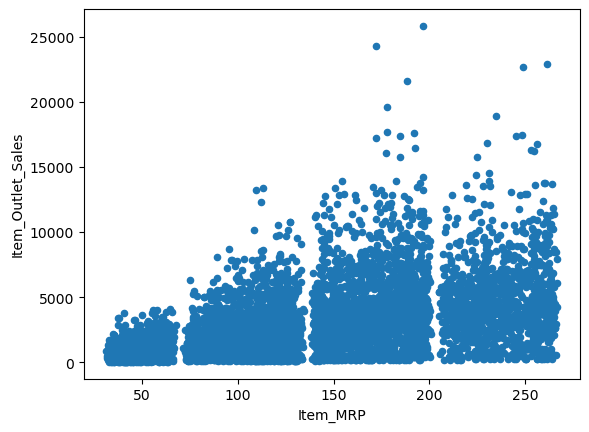

In [15]:
sales_by_item_type = df.groupby('Item_MRP')['Item_Outlet_Sales'].sum().reset_index()
sales_by_item_type.plot(kind='scatter', x='Item_MRP', y= 'Item_Outlet_Sales')

In [16]:
df.columns
df_num_columns = ['Item_Weight',  'Item_Visibility','Item_MRP','Outlet_Establishment_Year', 'Item_Outlet_Sales']
Weight_median = df['Item_Weight'].median()


<AxesSubplot:>

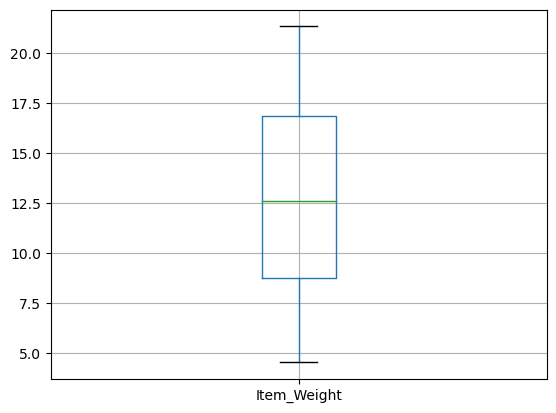

In [17]:
df.boxplot(column=['Item_Weight'])

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
duplicate = df.duplicated()

duplicate.sum()

0

<AxesSubplot:>

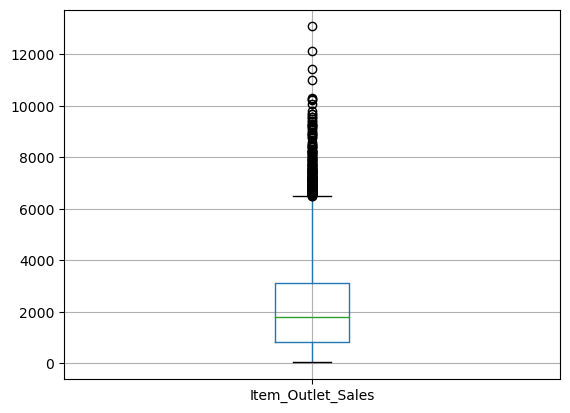

In [20]:
df.boxplot(column=['Item_Outlet_Sales'])

In [21]:
(df['Item_Outlet_Sales'].between(6000 , 10000) ).sum()

281

<AxesSubplot:>

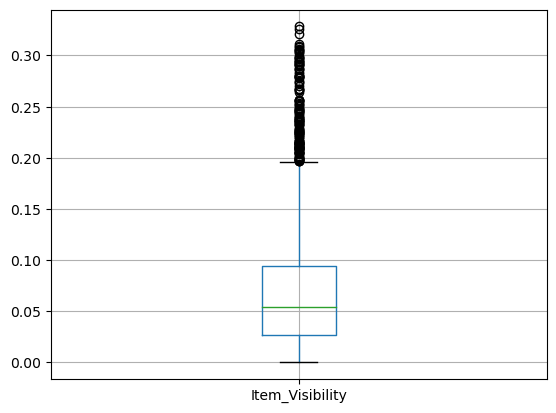

In [22]:
df.boxplot(column=['Item_Visibility'])

In [23]:
(df['Item_Visibility']>0.2).sum()

134

In [24]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [26]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [27]:
mean_weight = df_train['Item_Weight'].mean()

df_train['Item_Weight'] = df_train['Item_Weight'].replace(np.nan , mean_weight)

df_train['Item_Weight'].isnull().sum()

0

In [28]:
mode_outlet_size = df_train['Outlet_Size'].mode().values[0]

df_train['Outlet_Size'] = df_train['Outlet_Size'].replace(np.nan , mode_outlet_size)

df_train['Outlet_Size'].isnull().sum()

0

In [29]:
std_scale =  StandardScaler()
#standar scale for Item_Outlet_Sales
df['Item_Outlet_Sales'] = std_scale.fit_transform(df[['Item_Outlet_Sales']])

df_train['Item_Weight'] = std_scale.fit_transform(df_train[['Item_Weight']])
df_train['Item_MRP'] = std_scale.fit_transform(df_train[['Item_MRP']])
df_train['Item_Visibility'] = std_scale.fit_transform(df_train[['Item_Visibility']])
df_train['Outlet_Establishment_Year'] = std_scale.fit_transform(df_train[['Outlet_Establishment_Year']])

In [30]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [31]:
# Define the list of categorical columns to encode
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' drops the first category to avoid multicollinearity

# Fit and transform the encoder on the categorical columns
encoded_data = encoder.fit_transform(df_train[categorical_columns])

# Create a DataFrame from the encoded data with column names
encoded_df_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Reset the indexes of both DataFrames
df_train.reset_index(drop=True, inplace=True)
encoded_df_train.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df_train = pd.concat([df_train, encoded_df_train], axis=1)

# Drop the original categorical columns if needed
df_train.drop(categorical_columns, axis=1, inplace=True)





In [32]:
df_train.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Identifier_DRA24            0
                                ..
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Length: 1597, dtype: int64

In [33]:
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-0.970732,1.747454,0.139541,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.641706,-0.908111,-1.489023,1.334103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.098554,-0.956917,0.010040,0.139541,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.500838,-1.281758,0.660050,0.020085,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.929428,-1.281758,-1.399220,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1597 entries, Item_Weight to Outlet_Type_Supermarket Type3
dtypes: float64(1597)
memory usage: 103.8 MB


In [35]:
###

        #TEST Dataset

###

In [36]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [38]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [39]:
mean_weight_test = df_test['Item_Weight'].mean()

df_test['Item_Weight'] = df_test['Item_Weight'].replace(np.nan , mean_weight_test)

df_test['Item_Weight'].isnull().sum()

0

In [40]:
mode_outlet_size_test = df_test['Outlet_Size'].mode().values[0]

df_test['Outlet_Size'] = df_test['Outlet_Size'].replace(np.nan , mode_outlet_size_test)


df_test['Outlet_Size'].isnull().sum()

0

In [41]:
std_scale =  StandardScaler()

df_test['Item_Weight'] = std_scale.fit_transform(df_test[['Item_Weight']])
df_test['Item_MRP'] = std_scale.fit_transform(df_test[['Item_MRP']])
df_test['Item_Visibility'] = std_scale.fit_transform(df_test[['Item_Visibility']])
df_test['Outlet_Establishment_Year'] = std_scale.fit_transform(df_test[['Outlet_Establishment_Year']])

In [42]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [43]:
# Define the list of categorical columns to encode
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' drops the first category to avoid multicollinearity

# Fit and transform the encoder on the categorical columns
encoded_data = encoder.fit_transform(df_test[categorical_columns])

# Create a DataFrame from the encoded data with column names
encoded_df_test = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Reset the indexes of both DataFrames
df_test.reset_index(drop=True, inplace=True)
encoded_df_test.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df_test = pd.concat([df_test, encoded_df_test], axis=1)

# Drop the original categorical columns if needed
df_test.drop(categorical_columns, axis=1, inplace=True)

In [44]:
df_test.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Outlet_Establishment_Year        0
Item_Identifier_DRA24            0
                                ..
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Length: 1581, dtype: int64

In [45]:
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.897460e+00,-1.134077,-0.536555,0.139891,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.035530e+00,-0.531850,-0.868937,1.095512,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4.486336e-01,0.661316,1.629848,0.020438,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.267578e+00,-0.981416,0.226697,1.095512,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-5.230960e-14,1.032540,1.508110,-1.532446,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [46]:
# Get the columns that are in df_train but not in df_test
columns_not_in_test = set(df_train.columns) - set(df_test.columns)

# Convert the result to a list if needed
columns_not_in_test_list = list(columns_not_in_test)

# Print or use the columns as needed
print(columns_not_in_test_list)

['Item_Identifier_DRE49', 'Item_Identifier_FDA04', 'Item_Identifier_FDL10', 'Item_Identifier_FDU19', 'Item_Identifier_FDL34', 'Item_Identifier_FDT07', 'Item_Identifier_NCY18', 'Item_Identifier_NCQ06', 'Item_Identifier_FDX20', 'Item_Identifier_FDW13', 'Item_Identifier_FDO19', 'Item_Identifier_FDG24', 'Item_Identifier_FDG33', 'Item_Identifier_FDX04', 'Item_Identifier_NCL31', 'Item_Identifier_FDO52']


In [47]:
y_train = df['Item_Outlet_Sales']
x_train = df_train.drop(columns=columns_not_in_test_list)
x_test = df_test
x_train.shape

(8523, 1581)

In [48]:
y_train.shape

(8523,)

In [49]:
df['Item_Outlet_Sales'].isnull().sum()

0

In [50]:
model = LinearRegression().fit(x_train, y_train)

In [51]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6428557752846912


In [52]:
# Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(x_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(x_test)

scores = cross_val_score(ridge_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [(-score) ** 0.5 for score in scores]  # Convert negative MSE to RMSE

# Compute mean RMSE and standard deviation
mean_rmse = sum(rmse_scores) / len(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Mean RMSE (cross-validation):", mean_rmse)
print("Standard Deviation of RMSE (cross-validation):", std_rmse)

Mean RMSE (cross-validation): 0.7156688242017022
Standard Deviation of RMSE (cross-validation): 0.00935591438918622


In [168]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# You can adjust hyperparameters like 'n_estimators', 'max_depth', etc., to optimize the model

# Define the scoring function for cross-validation (use neg_mean_squared_error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring=scorer)

# Convert negative MSE to RMSE and calculate the mean and standard deviation
rmse_scores = np.sqrt(-cv_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Calculate R-squared (R2) scores as well if needed
r2_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(r2_scores)

print("Random Forest Regression with Cross-Validation:")
print("Mean RMSE (cross-validation):", mean_rmse)
print("Standard Deviation of RMSE (cross-validation):", std_rmse)
print("Mean R-squared (R2) (cross-validation):", mean_r2)

Random Forest Regression with Cross-Validation:
Mean RMSE (cross-validation): 0.6710374581317795
Standard Deviation of RMSE (cross-validation): 0.007284692079857496
Mean R-squared (R2) (cross-validation): 0.5485283599506395


In [172]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
import xgboost as xgb
from xgboost import XGBRegressor

In [54]:
# Create an XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Define the scoring function for cross-validation (use neg_mean_squared_error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring=scorer)

# Convert negative MSE to RMSE and calculate the mean and standard deviation
rmse_scores = np.sqrt(-cv_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("XGBoost Regression with Cross-Validation:")
print("Mean RMSE (cross-validation):", mean_rmse)
print("Standard Deviation of RMSE (cross-validation):", std_rmse)

XGBoost Regression with Cross-Validation:
Mean RMSE (cross-validation): 0.6410493252237904
Standard Deviation of RMSE (cross-validation): 0.007104056320832138
